In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [2]:
df = pd.read_csv(r'./Fedex_6M.csv')

In [3]:
df.head()

,Month,DayOfWeek,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Distance,Carrier_Name,Delivery_Status
0,1,4,1955,2225,150.0,810,WN,0.0
1,1,4,735,1000,145.0,810,WN,1.0
2,1,4,620,750,90.0,515,WN,0.0
3,1,4,930,1100,90.0,515,WN,0.0
4,1,4,1755,1925,90.0,515,WN,1.0


In [4]:
df.describe()

,Month,DayOfWeek,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Distance,Delivery_Status
count,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.603628e+06,3.604175e+06,3.522573e+06
mean,3.514942e+00,3.934604e+00,1.329371e+03,1.495305e+03,1.291603e+02,7.280915e+02,2.038890e-01
std,1.709912e+00,1.987126e+00,4.664365e+02,4.854825e+02,6.951011e+01,5.611318e+02,4.028875e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+01,1.100000e+01,0.000000e+00
25%,2.000000e+00,2.000000e+00,9.250000e+02,1.115000e+03,8.000000e+01,3.250000e+02,0.000000e+00
50%,4.000000e+00,4.000000e+00,1.321000e+03,1.519000e+03,1.110000e+02,5.830000e+02,0.000000e+00
75%,5.000000e+00,6.000000e+00,1.720000e+03,1.910000e+03,1.600000e+02,9.570000e+02,0.000000e+00
max,6.000000e+00,7.000000e+00,2.359000e+03,2.400000e+03,1.435000e+03,4.962000e+03,1.000000e+00


*There are some negative travel time, looks like data entry error, let us reverse the sign*

In [5]:
df.loc[df[df.Planned_TimeofTravel<0].index, 'Planned_TimeofTravel'] = -df.loc[df[df.Planned_TimeofTravel<0].index, 'Planned_TimeofTravel']

**Delivery Status is nan, Delivery_Status being the target variable, these rows are useless. Let us drop them**

In [6]:
df.drop(df.Delivery_Status[df.Delivery_Status.isna()].index, axis=0, inplace=True)

*we just need hours for time, so extract the hours *

In [7]:
df['Planned_Delivery_Time'] = (df.Planned_Delivery_Time/100).astype('int')
df['Planned_Shipment_Time'] = (df.Planned_Shipment_Time/100).astype('int')

In [8]:
df.isna().sum(axis=0)

Month                      0
DayOfWeek                  0
Planned_Shipment_Time      0
Planned_Delivery_Time      0
Planned_TimeofTravel     406
Distance                   0
Carrier_Name               0
Delivery_Status            0
dtype: int64

In [9]:
df[df.Planned_TimeofTravel.isna()].tail()

,Month,DayOfWeek,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Distance,Carrier_Name,Delivery_Status
3471847,6,5,19,24,NaN,872,9E,0.0
3471890,6,7,13,24,NaN,184,9E,0.0
3473458,6,4,10,10,NaN,247,9E,0.0
3473459,6,4,11,13,NaN,247,9E,0.0
3541876,6,7,14,17,NaN,938,B6,1.0


**Let us impute missing value using Distance **

In [10]:
df.loc[df[df.Planned_TimeofTravel.isna()].index, 'Planned_TimeofTravel'] = df[df.Planned_TimeofTravel.isna()].Distance.map(df.groupby('Distance')['Planned_TimeofTravel'].median().to_dict())

In [11]:
df.Planned_TimeofTravel.fillna(df.Planned_TimeofTravel.mean().astype('int'), inplace=True)

## Exploratory Data Analysis

**Is the target class balanced?**

In [12]:
df.Delivery_Status.value_counts(normalize=True)

0.0    0.796111
1.0    0.203889
Name: Delivery_Status, dtype: float64

*Classes seems to be imbalenced. 80% of the time the delivery did not happen on time*

**Are deliveries impacted by month?**

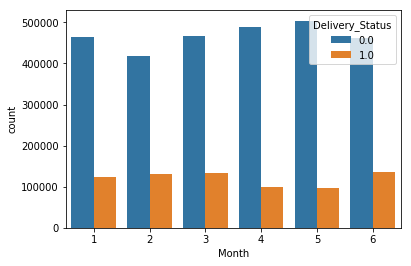

In [13]:
sns.countplot(x="Month", data=df, hue='Delivery_Status')

**Are deliveries impacted by week day?**

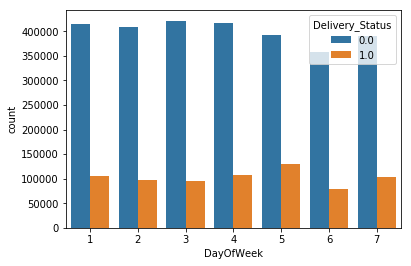

In [14]:
sns.countplot(x="DayOfWeek", data=df, hue='Delivery_Status')

*seems, DayOfWeek slighly impacts the delivery - Fridays (5) seems to be more successful*

**Planned Shipment Hour has any impact on the delivery status?**

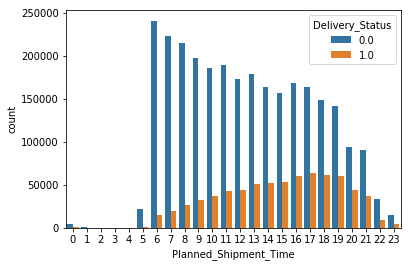

In [15]:
sns.countplot(x="Planned_Shipment_Time", data=df, hue='Delivery_Status')

*Seems shipments 11 AM -7PM seems to be more successful*

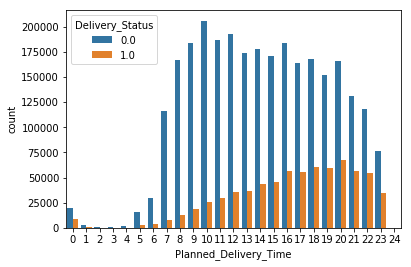

In [16]:
sns.countplot(x="Planned_Delivery_Time", data=df, hue='Delivery_Status')

*Again, planned delivery hours after 12 noon seems to be more successful*

**Any influence of TimeofTravel on delivery status?**

*Seems larger/smaller distances has no siginficant impact on delivery status*. However some cities seems very poor success rates

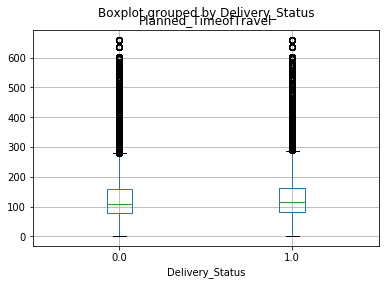

In [17]:
df.boxplot('Planned_TimeofTravel', by='Delivery_Status')

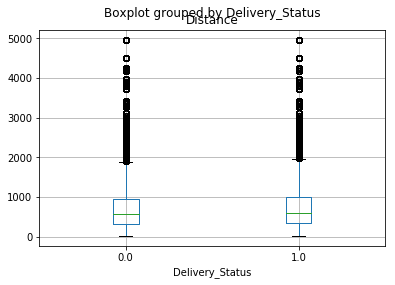

In [18]:
df.boxplot('Distance', by='Delivery_Status')

In [128]:
df['Speed'] = df.Distance/(df.Planned_TimeofTravel/60)

In [149]:
df.query('Planned_TimeofTravel<10').head()

,Month,DayOfWeek,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Distance,Carrier_Name,Delivery_Status,Speed


In [148]:
df.loc[df[df.Planned_TimeofTravel<10].index, 'Planned_TimeofTravel'] = df[df.Planned_TimeofTravel<10].Distance.map(df.groupby('Distance')['Planned_TimeofTravel'].median().to_dict())

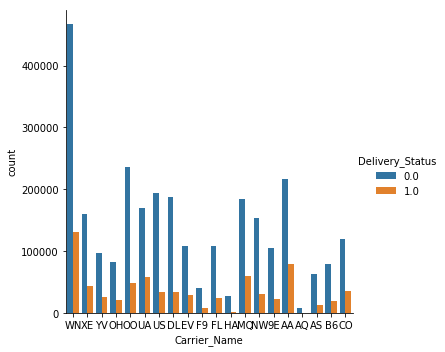

In [19]:
sns.catplot(x='Carrier_Name', kind='count', hue='Delivery_Status', data=df)

**Success rate by carrier **

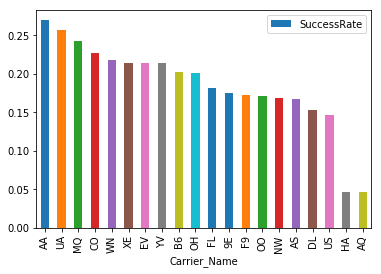

In [20]:
df.groupby('Carrier_Name')['Delivery_Status'].mean().rename('SuccessRate').reset_index().sort_values('SuccessRate', ascending=False).plot.bar(x='Carrier_Name', y='SuccessRate')

**Are there any correlation between Planned_TimeofTravel and Distance?**

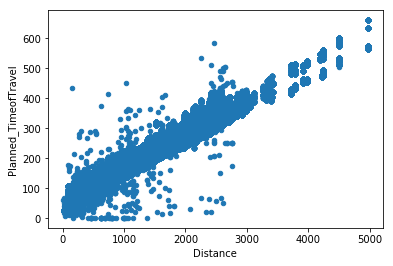

In [21]:
df.plot.scatter(x='Distance', y='Planned_TimeofTravel')

*Clearly Time of travel seems to increase with distance*

In [30]:
df.Month = pd.Categorical(df.Month)
df.DayOfWeek = pd.Categorical(df.DayOfWeek)
df.Carrier_Name = pd.Categorical(df.Carrier_Name)

## Fitting the model

In [150]:
df.head()

,Month,DayOfWeek,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Distance,Carrier_Name,Delivery_Status,Speed
0,1,4,19,22,150.0,810,WN,0.0,324.000000
1,1,4,7,10,145.0,810,WN,1.0,335.172414
2,1,4,6,7,90.0,515,WN,0.0,343.333333
3,1,4,9,11,90.0,515,WN,0.0,343.333333
4,1,4,17,19,90.0,515,WN,1.0,343.333333


In [151]:
import category_encoders as ce

In [152]:
te = ce.TargetEncoder(cols=['Month', 'DayOfWeek', 'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name', 'Planned_TimeofTravel', 'Distance'])

In [153]:
df_target_encoded = te.fit_transform(df.drop('Delivery_Status', axis=1), df.Delivery_Status)

In [40]:
df_target_encoded.head()

,Month,DayOfWeek,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Distance,Carrier_Name
0,0.209298,0.205396,0.298820,0.314486,0.234123,0.210972,0.218466
1,0.209298,0.205396,0.080794,0.111631,0.234618,0.210972,0.218466
2,0.209298,0.205396,0.059638,0.065909,0.215687,0.187602,0.218466
3,0.209298,0.205396,0.139130,0.135213,0.215687,0.187602,0.218466
4,0.209298,0.205396,0.281443,0.281009,0.215687,0.187602,0.218466


** Let us leave some rows as test set **

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(df_target_encoded, df.Delivery_Status, test_size=0.20, random_state=1, stratify=df.Delivery_Status)
#X_train, X_test, y_train, y_test = train_test_split(df, df.Delivery_Status, test_size=0.20, random_state=1)

In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [157]:
clf = DecisionTreeClassifier(random_state=0, class_weight={0:.8, 1:.2}, max_depth=10, min_samples_split = .01, min_samples_leaf=50, max_features=2)

In [158]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.20, random_state=1, stratify=y_train)

In [159]:
clf.fit(X_train_split, y_train_split)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, criterion='gini',
            max_depth=10, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [160]:
X_train_split.columns

Index(['Month', 'DayOfWeek', 'Planned_Shipment_Time', 'Planned_Delivery_Time',
       'Planned_TimeofTravel', 'Distance', 'Carrier_Name', 'Speed'],
      dtype='object')

In [161]:
clf.feature_importances_

array([0.06823952, 0.0515057 , 0.45465675, 0.12546586, 0.04352235,
       0.16579   , 0.08564051, 0.00517931])

In [162]:
y_train_split_pred = clf.predict(X_train_split)

In [163]:
import sklearn.metrics

In [164]:
sklearn.metrics.confusion_matrix(y_train_split, y_train_split_pred)

array([[1794789,       0],
       [ 459657,       0]], dtype=int64)

In [165]:
y_val_split_pred = clf.predict(X_val_split)

In [166]:
sklearn.metrics.confusion_matrix(y_val_split, y_val_split_pred)

array([[448698,      0],
       [114914,      0]], dtype=int64)

In [74]:
# converting into the pdf file
with open("FedEx.dot", "w") as f:
    sklearn.tree.export_graphviz(clf, out_file=f)

In [169]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [170]:
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [178]:
X_resampled, y_resampled = ros.fit_sample(X_train_split, y_train_split)

In [179]:
clf = DecisionTreeClassifier(random_state=0, min_samples_split = .001, min_samples_leaf=10, max_features=2)
#clf = DecisionTreeClassifier(random_state=0)

In [180]:
clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=0.001, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [83]:
# converting into the pdf file
with open("FedEx.dot", "w") as f:
    sklearn.tree.export_graphviz(clf, out_file=f)

In [181]:
y_val_split_pred = clf.predict(X_val_split)

In [182]:
y_train_split_pred = clf.predict(X_resampled)

In [183]:
sklearn.metrics.accuracy_score(y_pred=y_train_split_pred, y_true=y_resampled)

0.6456196243681012

In [184]:
sklearn.metrics.accuracy_score(y_pred=y_val_split_pred, y_true=y_val_split)

0.6281590881670369

In [185]:
sklearn.metrics.confusion_matrix(y_resampled, y_train_split_pred)

array([[1121672,  673117],
       [ 598959, 1195830]], dtype=int64)

In [186]:
sklearn.metrics.confusion_matrix(y_val_split, y_val_split_pred)

array([[278825, 169873],
       [ 39701,  75213]], dtype=int64)

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [189]:
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [190]:
y_val_split_pred = clf.predict(X_val_split)
y_train_split_pred = clf.predict(X_resampled)

In [191]:
print('train accuracy:', sklearn.metrics.accuracy_score(y_pred=y_train_split_pred, y_true=y_resampled))
print('validation accuracy:', sklearn.metrics.accuracy_score(y_pred=y_val_split_pred, y_true=y_val_split))

train accuracy: 0.6456196243681012
validation accuracy: 0.6281590881670369
